# Kernel Sandbox

A notebook for exploring kernels for BiSON SMMF data modelling.

## Defining a kernel

Go for the custom Celerite Kernel:

$k(\tau) = \frac{a}{2+b}\,e^{-c\,\tau}\left[
    \cos\left(\frac{2\,\pi\,\tau}{P}\right) + (1+b)
\right]$

where this should be used for explaining rotation in the BiSON SMMF. Period of rotation, P, amplitude of signal, a, decay parameter, c, and finally the factor, b.

Here is an example of a kernel function shell.  You can either fill in the missing line near the end, or delete the shell and write the function from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def kernel(t1, t2, p):
    '''
    A function to calculate the squared exponential covariance matrix 
    
    Inputs:
        t1:
            An array of times, i.e., [t1_1, t1_2, t1_3, ..., t1_n]
        t2:
            Another array of times, i.e., [t2_1, t2_2, t2_3, ..., t2_n]
        p:
            The parameters of the squared exponential kernel 
            p[0] = a [amplitude]
            p[1] = b [factor]
            p[2] = c [length scale]
            p[3] = P [period]
            
    Returns:
        The covariance matrix where:
            $k(\tau) = \frac{a}{2+b}\,e^{-c\,\tau}\left[ \cos\left(\frac{2\,\pi\,\tau}{P}\right) + (1+b) \right]$
            where: $\tau = | t_i - t_j |$
    '''
    # the vector of all |t_i - t_j| = np.subtract.outer(t1, t2)
    cov = np.zeros([len(t1), len(t2)])
    cov = (p[0] / (2 + p[1])) * np.exp(-1*p[2]*np.subtract.outer(t1, t2)) * (np.cos(2*np.pi*np.subtract.outer(t1, t2)/p[3]) + (1 + p[1]))
    return cov

## Exploring the kernel

Let's take a look at the covariance matrix tro visualise the Kernel.

In [56]:
t = np.arange(0.0, 200, 1)
theta = [1, -1.0, 1/80, 27]

200


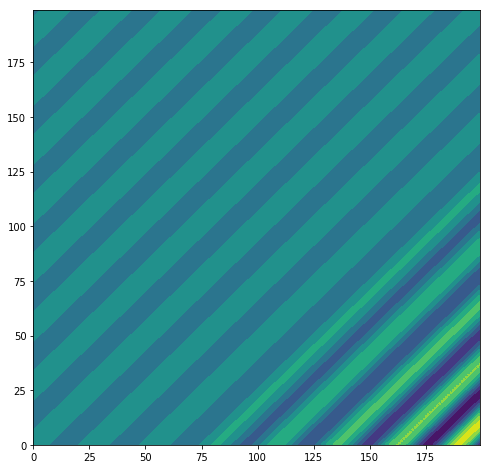

In [57]:
cov = kernel(t, t, theta)
mu = np.zeros(len(cov))  # The means
print(len(cov))

fig, ax = plt.subplots(figsize=[8,8])
ax.contourf(t, t, cov)

plt.show()

A straightforward way to visualize a kernel is to draw randomly from a multivariate Gaussian distribution with a covariance matrix of $K({\rm t_1}, {\rm t_1})$.

/home/exr007/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
No handles with labels found to put in legend.


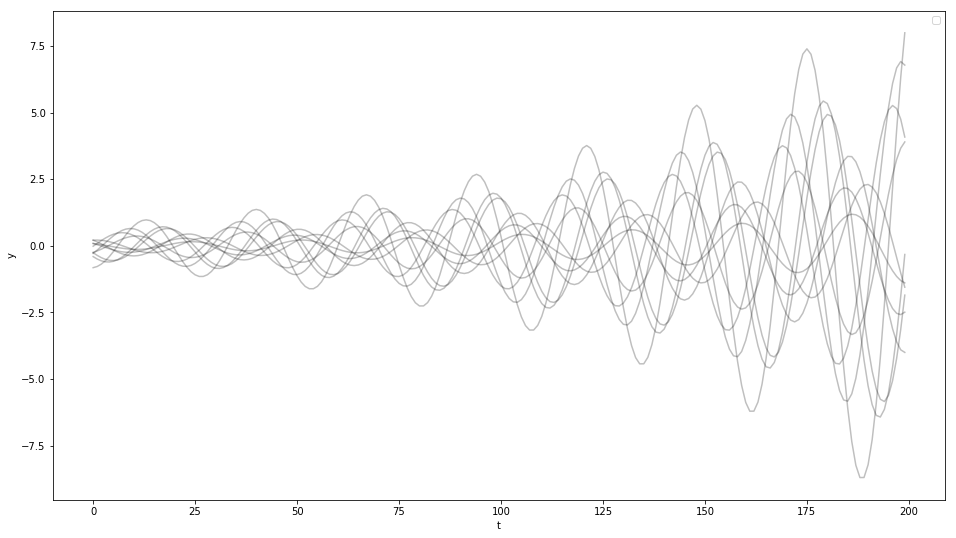

In [59]:
cov = kernel(t, t, theta)
mu = np.zeros(len(cov))  # The means

fig, ax = plt.subplots(figsize=[16,9])
for i in range(10):
    output = np.random.multivariate_normal(mu, cov)
    ax.plot(t, output, 'k', alpha=0.25)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()

Next, reuse this principle to create a stack of these for example for 5 sunspots...

/home/exr007/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
No handles with labels found to put in legend.
No handles with labels found to put in legend.


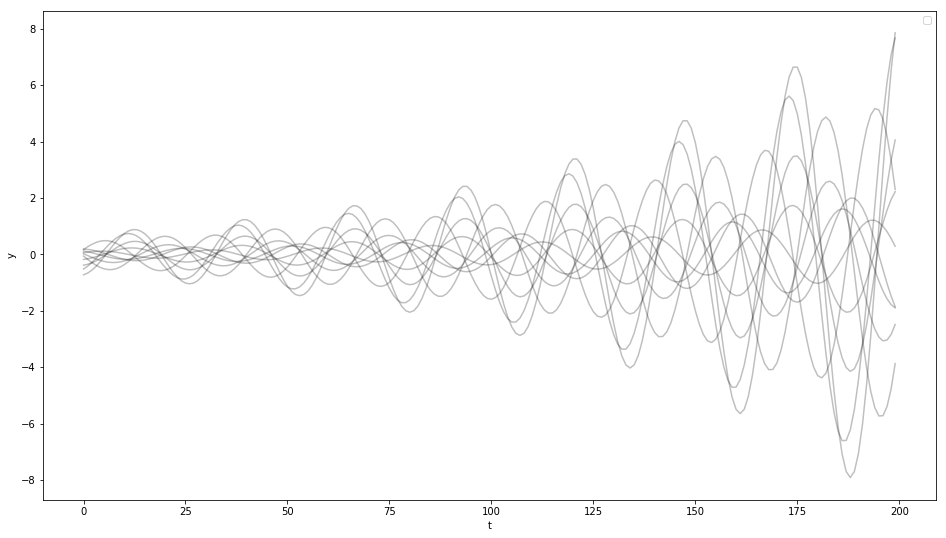

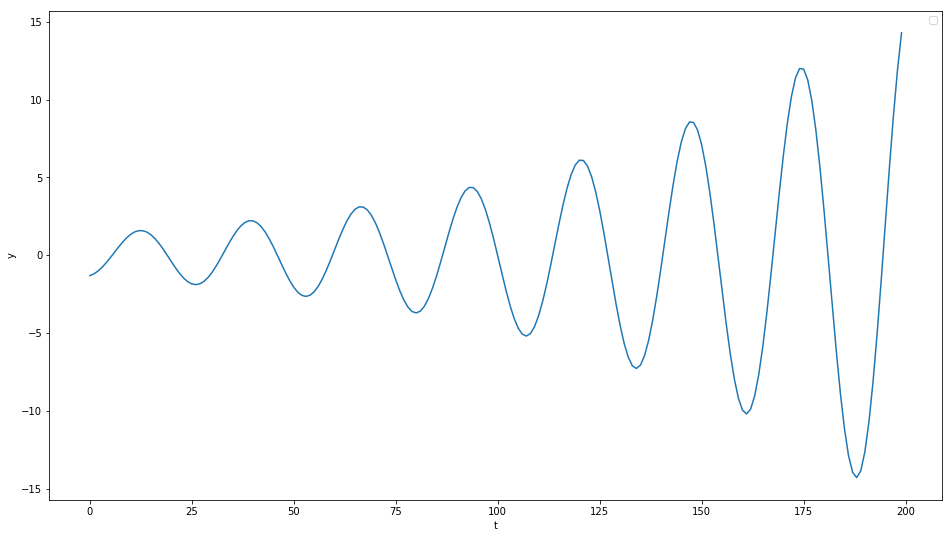

In [60]:
cov = kernel(t, t, theta)
mu = np.zeros(len(cov))  # The means

output = []
fig, ax = plt.subplots(figsize=[16,9])
for i in range(10):
    output.append(np.random.multivariate_normal(mu, cov))
    ax.plot(t, output[i], 'k', alpha=0.25)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()    

    
sn = np.sum(output, axis = 0)

fig, ax = plt.subplots(figsize=[16,9])
ax.plot(t, sn)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()

No handles with labels found to put in legend.


TS: 185.10107547690598
TS_var: 184.02408008590356
FD: 184.02408008590356


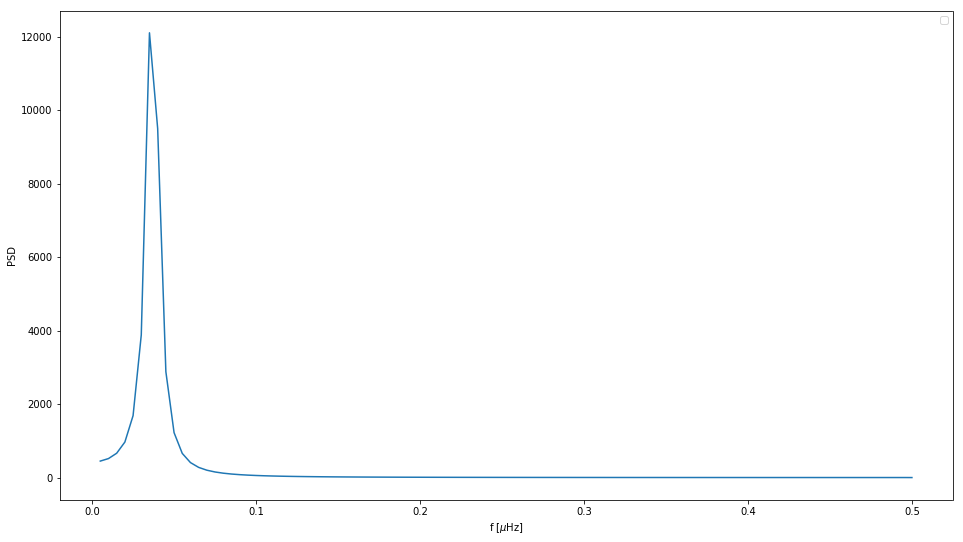

In [51]:
from astropy.stats import LombScargle
N = len(t)
dtmed = np.median(np.diff(t))
df = 1./(dtmed*N)
fmin = df # Not including zero-freq bin
frequencies = fmin + df * np.arange(N/2) # Not including zero-freq bin

power = LombScargle(t, sn).power(frequencies)
var = np.std(sn)**2

ts_energy = np.sum(np.abs(np.power(sn,2)))/N
            
power /= np.sum(power) # convert so sums to unity
power *= var # Parseval's
fd_energy = np.sum(np.abs(np.power(power,1)))
power /= df # convert to PSD
power = power
print('TS: %s'%ts_energy)
print('TS_var: %s'%var)
print('FD: %s'%fd_energy)

fig, ax = plt.subplots(figsize=[16,9])
ax.plot(frequencies, power)
ax.set_xlabel('f [$\mu$Hz]')
ax.set_ylabel('PSD')
ax.legend()

This is very much a single Lorentzian, therefore I'm quite tempted to suggest that a SHO kernel would be as good at describing the BiSON data as this custom term, as there are no harmonics in this power spectrum.